# **<font color=white> 03.K-means Code 실습**

[목적]
  - 비지도학습 중 하나인 Clustering 중 K-means Clustering 실습
  - ForLoop 활용 K의 Range를 변경 시켜가며 실습 진행
  - Clustering은 기본적으로 Data가 많을 때 시간이 굉장히 오래걸림
     - Distance Matrix를 만들고 행렬 계산을 하는 알고리즘이 많기 때문

[Process]
  1. Define X's
  2. Modeling

In [2]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

[기존 Classification Data 활용]
  - Clustering 후 Label과 비교

In [3]:
#loading the iris dataset
data = load_iris()

In [4]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# X's & Y Split
Y = pd.DataFrame(data['target'], columns = ['Target'])
X = pd.DataFrame(data['data'], columns = data['feature_names'])

In [6]:
X.shape

(150, 4)

In [7]:
data= pd.concat([X, Y], axis=1)

In [8]:
data.shape

(150, 5)

In [9]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


[Clustering 전 Scaling]
  - Clustering은 Distance를 구하는 작업이 필요함
  - Feature들의 Scale이 다르면 Distance를 구하는데 가중치가 들어가게 됨
  - 따라서, Distance 기반의 Clustering의 경우 Scaling이 필수

In [10]:
# Scaling
scaler = MinMaxScaler().fit(X)
X_scal = scaler.transform(X)
X_scal = pd.DataFrame(X_scal, columns=X.columns)

[차원축소]
  - Clustering의 결과를 확인하기 위하여 차원 축소 진행
  - 다음 Chapter에서 차원축소에 대해 자세히 설명할 예정

In [12]:
pca = PCA(n_components=2).fit(X)
X_PCA = pca.fit_transform(X)
X_EMM = pd.DataFrame(X_PCA, columns=['AXIS1','AXIS2'])
print(">>>> PCA Variance : {}".format(pca.explained_variance_ratio_))

>>>> PCA Variance : [0.92461872 0.05306648]


[K-means]
  - Hyperparameter Tuning using for Loop

[K-means Parameters]
  - Packge : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
  - n_clusters : Cluster 개수 (K)
  - n_init : Number of times the k-means algorithm is run with different centroid seeds
    - K-means는 Step2에서 '초기 중심점 설정'이라는 작업을 하는데, 초기 중심점을 셋팅하는 것에 따라 군집의 Quality가 달라짐
    - 따라서 여러번 시도해 보는것 
    - default = 10
  - max_iter : 몇번 Round를 진행할 것 인지
    - Round
       - Step 4: 중심점 재설정
       - Step 5: 데이터를 군집에 재할당
    - 이러한 Round를 최대 몇번까지 돌것인가?
    - default = 300
       - 300번 안에 중심점 움직임이 멈추지 않으면 그냥 STOP


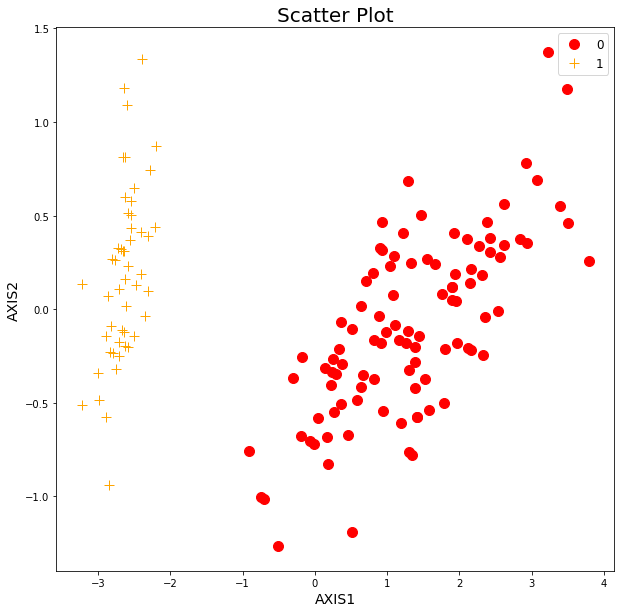

---------------------------------------------------------------------------------------------------


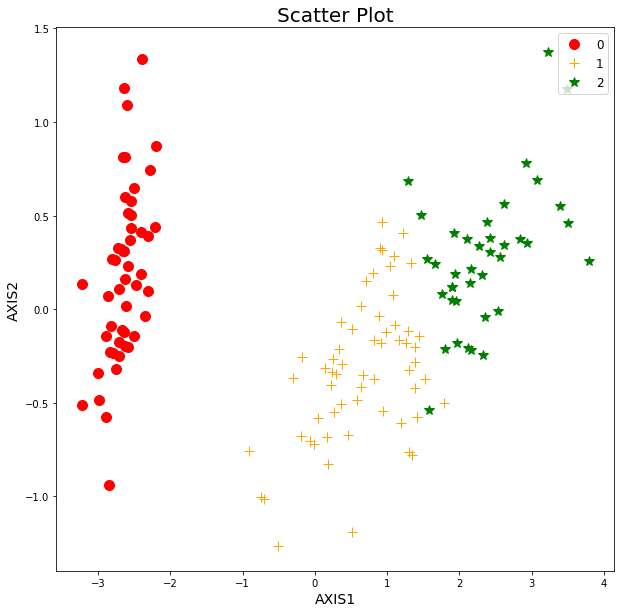

---------------------------------------------------------------------------------------------------


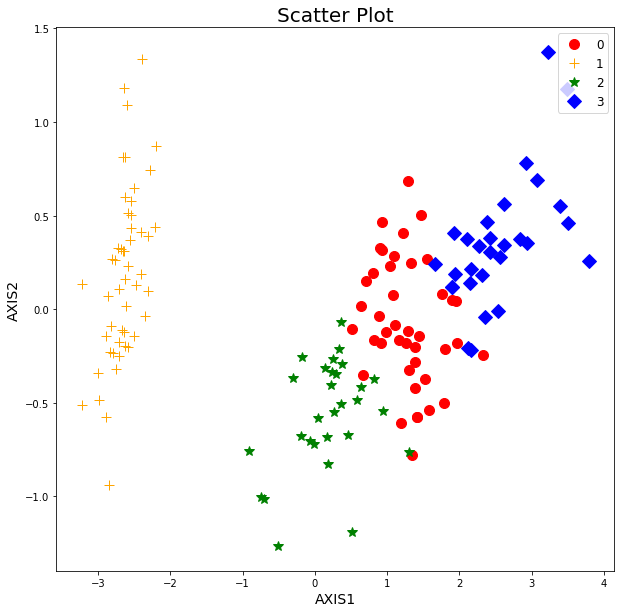

---------------------------------------------------------------------------------------------------


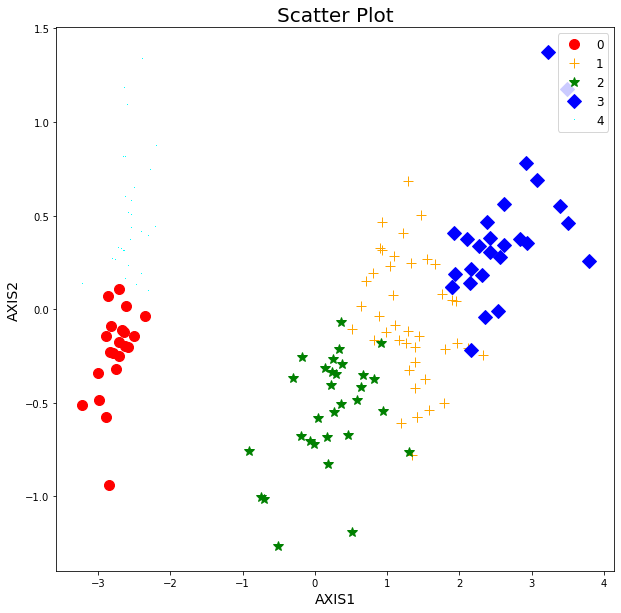

---------------------------------------------------------------------------------------------------


In [13]:
# K-means Modeling
for cluster in list(range(2, 6)):
    Cluster = KMeans(n_clusters=cluster).fit(X_scal)
    labels = Cluster.predict(X_scal)

    # label Add to DataFrame
    data['{} label'.format(cluster)] = labels
    labels = pd.DataFrame(labels, columns=['labels'])
    # Plot Data Setting
    plot_data = pd.concat([X_EMM, labels], axis=1)
    groups = plot_data.groupby('labels')

    mar = ['o', '+', '*', 'D', ',', 'h', '1', '2', '3', '4', 's', '<', '>']
    colo = ['red', 'orange', 'green', 'blue', 'cyan', 'magenta', 'black', 'yellow', 'grey', 'orchid', 'lightpink']

    fig, ax = plt.subplots(figsize=(10,10))
    for j, (name, group) in enumerate(groups):
        ax.plot(group['AXIS1'], 
                group['AXIS2'], 
                marker=mar[j],
                linestyle='',
                label=name,
                c = colo[j],
                ms=10)
        ax.legend(fontsize=12, loc='upper right') # legend position
    plt.title('Scatter Plot', fontsize=20)
    plt.xlabel('AXIS1', fontsize=14)
    plt.ylabel('AXIS2', fontsize=14)
    plt.show()
    print("---------------------------------------------------------------------------------------------------")

    gc.collect()

In [14]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,2 label,3 label,4 label,5 label
0,5.1,3.5,1.4,0.2,0,1,0,1,4
1,4.9,3.0,1.4,0.2,0,1,0,1,0
2,4.7,3.2,1.3,0.2,0,1,0,1,0
3,4.6,3.1,1.5,0.2,0,1,0,1,0
4,5.0,3.6,1.4,0.2,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,2,3,3
146,6.3,2.5,5.0,1.9,2,0,1,0,1
147,6.5,3.0,5.2,2.0,2,0,2,0,1
148,6.2,3.4,5.4,2.3,2,0,2,3,3


In [15]:
# Confusion Matrix 확인
cm = confusion_matrix(data['Target'], data['3 label'])
print(cm)

[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
